2.330295
2.330295
2.33025
2.33025
2.33026
2.33026
2.330255
2.33024
2.3302449999999997
2.33025
2.330265
2.33028
2.33028
2.3303
2.330285
2.330285
2.330245
2.330245
2.33035
2.3304
2.33041
2.33043
2.33043
2.33043
2.330435
2.330435
2.3303149999999997
2.330275
2.33026
2.3302899999999998
2.33028
2.33028
2.330235
2.33031
2.330265
2.330255
2.330265
2.330245
2.330255
2.330245
2.3303
2.33032
2.330275
2.330245
2.330235
2.330235
2.330235
2.330225
2.330235
2.330235
2.33023
2.33024
2.33024
2.33023
2.330245
2.33026
2.33028
2.330355
2.330365
2.330365
2.33035
2.330375
2.330405
2.330435
2.330475
2.330475
2.330475
2.330475
2.330525
2.330565
2.330575
2.3306
2.33062
2.330655
2.33067
2.33068
2.3306750000000003
2.3306899999999997
2.330695
2.330695
2.330685
2.330685
2.330685
2.3307599999999997
2.33085
2.330885
2.330935
2.330985
2.33099
2.330995
2.330995
2.330995
2.3309800000000003
2.3309699999999998
2.3309699999999998
2.330975
2.330985
2.330975
2.330985
2.330995
2.3310250000000003
2.3310999999999997
2.3312
2.3

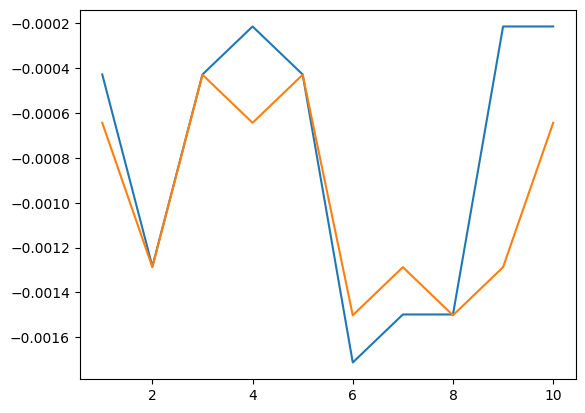

[-0.00042817017193693156, -0.001284510515848824, -0.0004281701719559461, -0.00021408508596846578, -0.0004281701719559461, -0.0017126806878047698, -0.0014985956018172895, -0.0014985956018172895, -0.00021408508596846578, -0.00021408508596846578]
[-0.0004281353421281505, -0.0010703383553393893, -0.0010703383553393893, -0.00021406767106407526, -0.0004281353421281505, -0.0017125413685696409, -0.0017125413685696409, -0.0017125413685696409, -0.0021406767107168046, -0.0019266090396337164]
--------------------
predicted outcome [-0.0004281353421281505, -0.0010703383553393893, -0.0010703383553393893, -0.00021406767106407526, -0.0004281353421281505, -0.0017125413685696409, -0.0017125413685696409, -0.0017125413685696409, -0.0021406767107168046, -0.0019266090396337164]


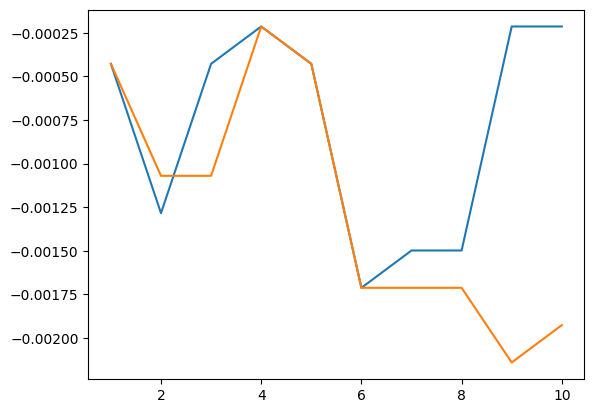

In [12]:
import matplotlib
import functools
import time
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
import numpy as np
import csv
import os



# we need this helper function to display our data
def bytespdate2num(fmt,encoding = "utf-8"): # we have our fmt meaning we will need a type of formatting , and our encoding turns a string into a byte object
    def bytesconverter(b):# it will then be encoding using utf-8 syntax , then define another function wih parameter b which becomes our byte obj
        s = b.decode(encoding) # the decode function takes a string and then encodes into a new format in our case it is "utf-8"
        return mdates.datestr2num(s)
    return bytesconverter # we are returning the function which then excecutes its outer function with our encoding specified , we need fmt for all of that


date,bid,ask = np.loadtxt(r"C:\Users\agboo\Downloads\Stock Prediction\GBPUSD\GBPUSD1d.txt",unpack = True, delimiter = ",",converters = {0:bytespdate2num("%Y-%m-&d %H:%M:%S")})       

avgLine = bid + ask / 2

patternArray = []
performance = []
recog_pattern = []




# we will define a percent change function
def percentChange(startpoint,currentpoint): # new - old / old & 100
    return ((float(currentpoint)-startpoint)/abs(startpoint))*100 + 0.000000000000000000000000000000000000001 # using abs to avoid negtive values
    # using very small decimal to avoid division by zero hopefully adding a decimal this small shouldnt influence our patter recognition

    

def patternstore():
    start = time.time()
    x = len(avgLine) - 30
    
    y = 11
    while y < x:
        pattern = []
        p1 = percentChange(avgLine[y-10],avgLine[y-9]) # since we are doing 10 ticks we need 10 patterns , this will be the first point in the pattern
        p2 = percentChange(avgLine[y-10],avgLine[y-8])
        p3 = percentChange(avgLine[y-10],avgLine[y-7])
        p4 = percentChange(avgLine[y-10],avgLine[y-6])
        p5 = percentChange(avgLine[y-10],avgLine[y-5])
        p6 = percentChange(avgLine[y-10],avgLine[y-4])
        p7 = percentChange(avgLine[y-10],avgLine[y-3])
        p8 = percentChange(avgLine[y-10],avgLine[y-2])
        p9 = percentChange(avgLine[y-10],avgLine[y-1])
        p10 = percentChange(avgLine[y-10],avgLine[y-0])

        outcomeRange = avgLine[y + 20 : y + 30] # produces array of points
        currentpoint = avgLine[y]
        

        # we need reduce so we can apply our lamda to our array outcome range
        try:   
            avgoutcome = (functools.reduce(lambda x, y: x+y , outcomeRange) / len(outcomeRange))
        except Exception as e:
            print(e)# this will give use what ever error happend
            avgoutcome = 0
        futureoutcome = percentChange(currentpoint,avgoutcome)
        pattern.append(p1)
        pattern.append(p2)
        pattern.append(p3)
        pattern.append(p4)
        pattern.append(p5)
        pattern.append(p6)
        pattern.append(p7)
        pattern.append(p8)
        pattern.append(p9)
        pattern.append(p10)
        patternArray.append(pattern)
        performance.append(futureoutcome)
        # no we are storing patterns as they come , our list will grow very fast
        

        # then we use a lamda exspression to then avg all of our variables
        print(currentpoint) # current point

        y += 1 # this way we are iterating through
    end = time.time()
    print(len(patternArray))
    print(len(performance))
    
    print("This took " + str(end - start) + " seconds")
    # sucessfully stores patterns as arrays


    

def graphRawFX(): # to plot data
    date,bid,ask = np.loadtxt(r"C:\Users\agboo\Downloads\Stock Prediction\GBPUSD\GBPUSD1d.txt",unpack = True, delimiter = ",",converters = {0:bytespdate2num("%Y-%m-&d %H:%M:%S")}) # numbers to date
    # we need the entire file path with np load
                              
    fig = plt.figure(figsize=(10,7)) # creating figure then denoting its size
    axis = plt.subplot2grid((40,40),(0,0),rowspan=40,colspan=40) # 40 by 40 grid , starting at origin , row and column spans of 40 apart
    axis.plot(date,bid)
    axis.plot(date,ask)

    plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)



    
    axis.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-&d %H:%M:%S")) # making our x axis more user freindly to look at
    for label in axis.xaxis.get_ticklabels():
        label.set_rotation(45) # this causes the rotation on the graph we rotated it five degrees
    second_axis = axis.twinx()
    second_axis.fill_between(date, 0 ,(ask - bid) , facecolor = "purple" , alpha = 0.3) # this is the spread , # higher spread is bad , lower spread means more liquid
    # more likley to buy

    # we want longer decimals

    plt.subplots_adjust(bottom = 0.23) # further formatitng
    plt.grid(True) # so grid appears
    plt.show()



def currentpattern():

    cp1 = percentChange(avgLine[-11],avgLine[-10]) # this way as we are collecting patterns the span we 
    cp2 = percentChange(avgLine[-11],avgLine[-9])
    cp3 = percentChange(avgLine[-11],avgLine[-8]) # we can reach  increases 1 , 2, 3 ...
    cp4 = percentChange(avgLine[-11],avgLine[-7]) # if we have a pattern within this tick that is similar later then we can use it for
    cp5 = percentChange(avgLine[-11],avgLine[-6])# prediction later in the stock chart
    cp6 = percentChange(avgLine[-11],avgLine[-5])
    cp7 = percentChange(avgLine[-11],avgLine[-4])
    cp8 = percentChange(avgLine[-11],avgLine[-3])
    cp9 = percentChange(avgLine[-11],avgLine[-2])
    cp10 = percentChange(avgLine[-11],avgLine[-1])

    recog_pattern.append(cp1)
    recog_pattern.append(cp2)
    recog_pattern.append(cp3)
    recog_pattern.append(cp4)
    recog_pattern.append(cp5)
    recog_pattern.append(cp6)
    recog_pattern.append(cp7)
    recog_pattern.append(cp8)
    recog_pattern.append(cp9)
    recog_pattern.append(cp10)
    print(recog_pattern) # so this is the pattern we will examine and then compare to other patters

def pattern_recognition():
    for pattern in patternArray:
        sim1 = 100 - abs(percentChange(pattern[0] , recog_pattern[0])) # return the similarity 
        sim2 = 100 - abs(percentChange(pattern[1] , recog_pattern[1])) # return the next step
        sim3 = 100 - abs(percentChange(pattern[2] , recog_pattern[2])) # return 
        sim4 = 100 - abs(percentChange(pattern[3] , recog_pattern[3])) # return 
        sim5 = 100 - abs(percentChange(pattern[4] , recog_pattern[4])) # return 
        sim6 = 100 - abs(percentChange(pattern[5] , recog_pattern[5])) # return 
        sim7 = 100 - abs(percentChange(pattern[6] , recog_pattern[6])) # return 
        sim8 = 100 - abs(percentChange(pattern[7] , recog_pattern[7])) # return 
        sim9 = 100 - abs(percentChange(pattern[8] , recog_pattern[8])) # return 
        sim10 = 100 - abs(percentChange(pattern[9] , recog_pattern[9])) # return 
        # to extend this pattern add more varibles using n = 30 from statistics we can start to see real patterns
        # we would have to do this for all functions defined
        similarity = (sim1 + sim2 + sim3 + sim4 + sim5 + sim6 + sim7 + sim8 + sim9 + sim10) / 10

        if similarity > 70:

            patdex = patternArray.index(pattern) # returning the step we are in




            
            print(recog_pattern)
            print(pattern)
            print("--------------------")
            print("predicted outcome " + str(patternArray[patdex]))
            xp = [1,2,3,4,5,6,7,8,9,10]
            fig = plt.figure()
            plt.plot(xp,recog_pattern)
            plt.plot(xp,pattern)
            plt.show()
            # showing how diffrent our patterns in question is to our predicted outcome
            # it is supposed to be similar in the begining







    


            


        


    


        


    
    













































patternstore() # store pattern
currentpattern() # find pattern in question
pattern_recognition() # from the step within the array print our predicted outcome
# this outputs a 10tick pattern
# take range of data in succession then create key pattersn to return key events

    





    
    
